In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("auto-mpg.csv")
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [60]:
df['power_to_weight'] = df['horsepower'] / df['weight']
df['disp_per_cyl'] = df['displacement'] / df['cylinders']
df['car_age'] = df['model year'].max() - df['model year']
df['hp_weight_interaction'] = df['horsepower'] * df['weight']
print(df[['power_to_weight','hp_weight_interaction','car_age','disp_per_cyl']])
features = [
    'weight',
    'horsepower',
    'model year',
    'disp_per_cyl',
    'car_age',
    'power_to_weight'
]
print(features)
X=df[features]
y=df['mpg']

     power_to_weight  hp_weight_interaction  car_age  disp_per_cyl
0           0.037100               455520.0       12        38.375
1           0.044679               609345.0       12        43.750
2           0.043655               515400.0       12        39.750
3           0.043694               514950.0       12        38.000
4           0.040591               482860.0       12        37.750
..               ...                    ...      ...           ...
387         0.030824               239940.0        0        35.000
388         0.024413               110760.0        0        24.250
389         0.036601               192780.0        0        33.750
390         0.030095               207375.0        0        30.000
391         0.030147               223040.0        0        29.750

[392 rows x 4 columns]
['weight', 'horsepower', 'model year', 'disp_per_cyl', 'car_age', 'power_to_weight']


In [92]:
#features=['cylinders','displacement','horsepower','weight','acceleration','model year']
#print(features)
#X=df[features]
#y=df['mpg']

In [94]:
print(df.info())
print(df.notnull().sum())
#print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mpg                    392 non-null    float64
 1   cylinders              392 non-null    int64  
 2   displacement           392 non-null    float64
 3   horsepower             392 non-null    float64
 4   weight                 392 non-null    int64  
 5   acceleration           392 non-null    float64
 6   model year             392 non-null    int64  
 7   origin                 392 non-null    int64  
 8   car name               392 non-null    object 
 9   housepower             392 non-null    float64
 10  HP_per_Weight          392 non-null    float64
 11  power_to_weight        392 non-null    float64
 12  disp_per_cyl           392 non-null    float64
 13  car_age                392 non-null    int64  
 14  hp_weight_interaction  392 non-null    float64
dtypes: flo

In [95]:
X_train_scaled,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [128]:
'''from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)'''

"from sklearn.pipeline import Pipeline\n\npipe = Pipeline([\n    ('poly', PolynomialFeatures(degree=2, include_bias=False)),\n    ('scaler', StandardScaler()),\n    ('model', LinearRegression())\n])\n\npipe.fit(X_train, y_train)"

In [142]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_leaf=2,
    random_state=42
)

model.fit(X_train, y_train)
print("Train R2:", model.score(X_train, y_train))
print("Test  R2:", model.score(X_test, y_test))

Train R2: 0.9672715591803291
Test  R2: 0.86686952606277


In [143]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("R^2 Score:",r2_score(y_test,y_pred))
rmse=np.sqrt(mse)
print("RMSE:",rmse)
print("MSE:",mse)

R^2 Score: 0.86686952606277
RMSE: 2.606733019846091
MSE: 6.795057036755921


In [146]:
import numpy as np
w,hp,d,c,myu=map(float,input("Enter the weight ,horse power, displacement, cylinders, model year").split())
disp_per_cyl=d/c
car_age=82 - myu 
pow_to_w=hp/w
new_car = np.array([[
    w,
    hp,
    myu,
    disp_per_cyl,
    car_age,
    pow_to_w
]])
#print("Km/L predicted:",model.predict(new_car)* 0.425144)
print("Km/L predicted:",model.predict(new_car))

Enter the weight ,horse power, displacement, cylinders, model year 2048 90 140 4 72


Km/L predicted: [26.74963286]


C:\Users\athav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


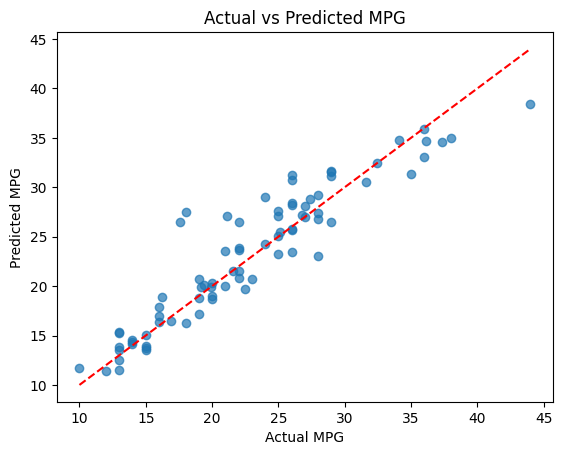

In [147]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()